#  FANGMAN Portfolio Analysis, Modern Portfolio Theory
Modern portfolio theory (MPT) is a theory on how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. According to the theory, it's possible to construct an "efficient frontier" of optimal portfolios offering the maximum possible expected return for a given level of risk.

MPT shows that an investor can construct a portfolio of multiple assets that will maximize returns for a given level of risk. Likewise, given a desired level of expected return, an investor can construct a portfolio with the lowest possible risk. Based on statistical measures such as variance and correlation, an individual investment's return is less important than how the investment behaves in the context of the entire portfolio.

Source: https://www.investopedia.com/terms/m/modernportfoliotheory.asp

##### Disclosure: Stocks mentioned in this portfolio should not be taken as a recommendation to buy or sell any security. This portfolio was created for perspective research only using Computational Finance strategies for portfolio management and optimization. Statistical data within this case study are thoroughly researched and believed to be accurate using Yahoo Finance API. However, discrepancies can occur with the data provided.  As an investor you should conduct your own research and recheck  for any missing data before making any final decisions regarding buying or selling any stocks. Past performances of stocks mentioned in this portfolio are not a guarantee of future performances.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

pd.options.display.float_format = '{:.2f}'.format

In [2]:
FANGMAN_Stocks = pd.read_csv("FANGMAN_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]

Gathering stock data from 3/23/20 which was Market bottom to recent close:

In [3]:
FANGMAN_Stocks = FANGMAN_Stocks.loc["2020-3-23":"2020-7-3"]

In [4]:
FANGMAN_Stocks.tail().dropna()

,AAPL,AMZN,FB,GOOGL,MSFT,NFLX,NVDA
Date,,,,,,,
2020-06-26,353.63,2692.87,216.08,1362.54,196.33,443.40,366.20
2020-06-29,361.78,2680.38,220.64,1397.17,198.44,447.24,368.00
2020-06-30,364.80,2758.82,227.07,1418.05,203.51,455.04,379.91
2020-07-01,364.11,2878.70,237.55,1442.00,204.70,485.64,381.20
2020-07-02,364.11,2890.30,233.42,1469.93,206.26,476.89,384.49


This function is used to calculate a summary of daily returns and to create a column for Returns and Risks of the stocks mentioned in the portfolio:

In [5]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

Daily Returns since the "Market Bottom":

In [6]:
ret = FANGMAN_Stocks.pct_change().dropna()

In [7]:
ret.tail().dropna()

,AAPL,AMZN,FB,GOOGL,MSFT,NFLX,NVDA
Date,,,,,,,
2020-06-26,-0.03,-0.02,-0.08,-0.05,-0.02,-0.05,-0.04
2020-06-29,0.02,-0.00,0.02,0.03,0.01,0.01,0.00
2020-06-30,0.01,0.03,0.03,0.01,0.03,0.02,0.03
2020-07-01,-0.00,0.04,0.05,0.02,0.01,0.07,0.00
2020-07-02,0.00,0.00,-0.02,0.02,0.01,-0.02,0.01


Risk and Return due to the Market Bottom:

In [8]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,1.81,0.40
AMZN,1.55,0.35
FB,1.73,0.47
GOOGL,1.27,0.41
MSFT,1.57,0.41
NFLX,1.08,0.40
NVDA,2.28,0.59


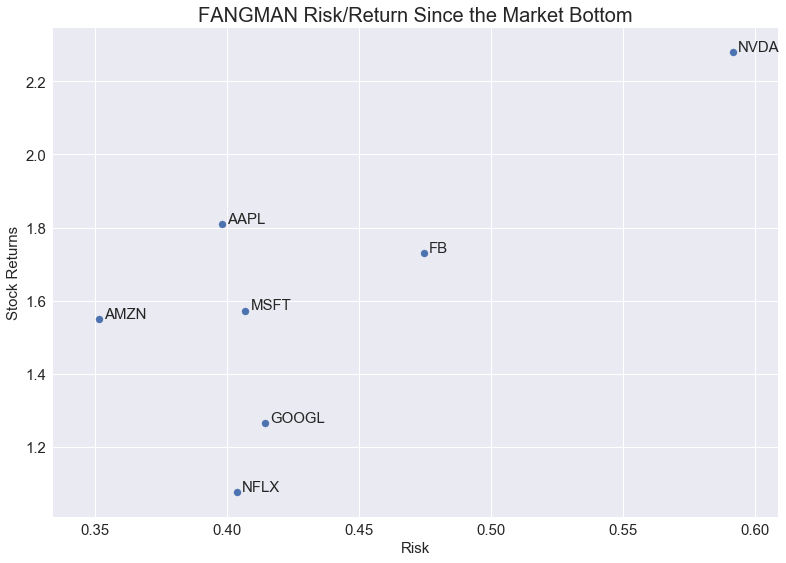

In [9]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Risk", fontsize = 15)
plt.ylabel("Stock Returns", fontsize = 15)
plt.title("FANGMAN Risk/Return Since the Market Bottom", fontsize = 20)
plt.show()

Number of assets in the portfolio (7), and 200,000 simulations of portfolios:

In [10]:
noa = len(FANGMAN_Stocks.columns)
nop = 200000
print(noa, nop)

7 200000


Creating simulation:
    
The Purpose of np.random.seed(123) is to prevent the values from repeating the same result. It makes sure we obtain differnt values for the simulation 

In [11]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

200,000 different weight combinations for each stock in the portfolio:

In [12]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)
weights

array([[0.17931222, 0.07366913, 0.05840494, ..., 0.18523372, 0.10893254,
        0.25250652],
       [0.21891035, 0.15373306, 0.12534296, ..., 0.23304556, 0.14019252,
        0.01907643],
       [0.12470984, 0.23121873, 0.05717584, ..., 0.16653848, 0.16662502,
        0.19876192],
       ...,
       [0.02748759, 0.14715434, 0.2154959 , ..., 0.05999275, 0.26615287,
        0.04321005],
       [0.22793625, 0.10954284, 0.02685271, ..., 0.19525126, 0.15478924,
        0.2286022 ],
       [0.16503739, 0.10978641, 0.19262093, ..., 0.14417785, 0.06700136,
        0.23077846]])

In [13]:
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

Daily Returns of 200,000 portfolios:

In [14]:
port_ret = ret.dot(weights.T)

In [15]:
port_ret.tail().dropna()

,0,1,2,3,4,5,6,7,8,9,...,199990,199991,199992,199993,199994,199995,199996,199997,199998,199999
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-26,-0.04,-0.04,-0.04,-0.04,-0.04,-0.05,-0.05,-0.05,-0.04,-0.04,...,-0.05,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.05,-0.03,-0.04
2020-06-29,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.02,0.01,0.01,...,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2020-06-30,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
2020-07-01,0.02,0.02,0.03,0.03,0.03,0.03,0.03,0.02,0.03,0.02,...,0.03,0.02,0.02,0.03,0.02,0.02,0.03,0.04,0.02,0.02
2020-07-02,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.01,...,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00


Risk and Return of 200,000 Portfolios

In [16]:
port_summary = ann_risk_return(port_ret)

In [17]:
port_summary.tail().dropna()

,Return,Risk
199995,1.71,0.40
199996,1.64,0.36
199997,1.43,0.35
199998,1.70,0.38
199999,1.74,0.40


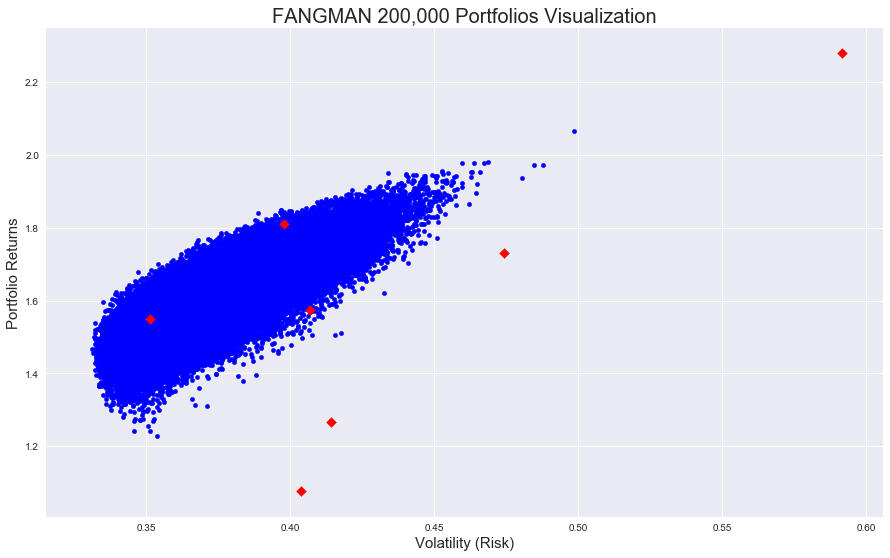

In [18]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "blue")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "red", marker = "D")
plt.xlabel('Volatility (Risk)', fontsize = 15)
plt.ylabel("Portfolio Returns", fontsize = 15)
plt.title("FANGMAN 200,000 Portfolios Visualization", fontsize = 20)
plt.show()

## FANGMAN Portfolio Analysis With The Sharpe Ratio

Sharpe Ratio is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

Since the Portfolio is from March 23 2020 to July 2 2020, we're going to be using the 3 month government bond as the Risk Free Rate, which is at 0.14% during the time of this case study when I checked the treasury yield, The treasury yields are subjective to change. https://www.bloomberg.com/markets/rates-bonds/government-bonds/us use this website to track the treasury yields.

Risk Free Rate:

In theory, the risk-free rate is the minimum return an investor expects for any investment because he will not accept additional risk unless the potential rate of return is greater than the risk-free rate. In practice, however, the risk-free rate does not exist because even the safest investments carry a very small amount of risk. Thus, the interest rate on a three-month U.S. Treasury bill is often used as the risk-free rate for U.S.-based investors.
https://www.investopedia.com/terms/r/risk-freerate.asp

In [19]:
risk_free_return = 0.014
risk_free_risk = 0

In [20]:
rf = [risk_free_return, risk_free_risk]
rf

[0.014, 0]

Sharpe Ratios for stocks in the portfolio:

In [21]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe
AAPL,1.81,0.40,4.52
AMZN,1.55,0.35,4.37
FB,1.73,0.47,3.62
GOOGL,1.27,0.41,3.02
MSFT,1.57,0.41,3.83
NFLX,1.08,0.40,2.63
NVDA,2.28,0.59,3.83


Stock Sharpe Ratio Analysis: Stocks with positive sharpe ratios, we're expecting postive performances. Stocks with negative sharpe ratios we're expecting negative performances

FANGMAN Portfolio Sharpe Ratios:

In [22]:
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0]))/port_summary["Risk"]

In [23]:
port_summary.tail().dropna()

,Return,Risk,Sharpe
199995,1.71,0.40,4.26
199996,1.64,0.36,4.57
199997,1.43,0.35,4.01
199998,1.70,0.38,4.38
199999,1.74,0.40,4.33


Results of 200,000 porfolios simulations:

In [24]:
port_summary.describe()

,Return,Risk,Sharpe
count,200000.00,200000.00,200000.00
mean,1.61,0.37,4.26
std,0.08,0.02,0.13
min,1.23,0.33,3.43
25%,1.55,0.36,4.18
50%,1.61,0.37,4.27
75%,1.67,0.39,4.36
max,2.07,0.50,4.79


out of 200,000 portfolio simulations, our maximum results lead to an 2.07% return, 0.50% risk and sharpe ratio of 4.79. The best performing portfolios usually have a Sharpe Ratios with 1 or above which is ideal to look for. In over all return of this portfolio combination is greater then risk. 

Plot 200,000 Portfolio Sharpe Ratio Performances. "vmin" comes from "25%", "vmax" comes from max sharpe ratio, and "alpha" comes from "max return" this is also a trial and error process to get the most out of the chart. data inputs comform the describe chart.

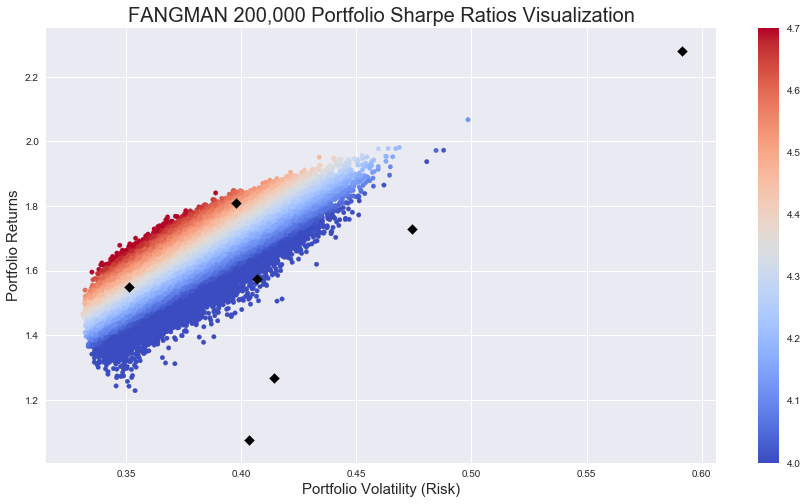

In [25]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 4.0, vmax = 4.7, alpha = 2.0)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("Portfolio Volatility (Risk)", fontsize = 15)
plt.ylabel("Portfolio Returns", fontsize = 15)
plt.title("FANGMAN 200,000 Portfolio Sharpe Ratios Visualization", fontsize = 20)
plt.show()

## The Optimal Portfolio - "Max Sharpe Ratio Portfolio"
Out of 200,000 simulated allocations, the "best portfolio" is portfolio 24,375:

In [26]:
msrp = port_summary.Sharpe.idxmax()
msrp

24375

Results of the Max Sharpe Ratio Portfolio:

In [27]:
port_summary.loc[msrp]

Return   1.68
Risk     0.35
Sharpe   4.79
Name: 24375, dtype: float64

The "optimal weights" of the portfolio:

In [28]:
msrp_w = weights[msrp, :]
msrp_w

array([0.48820865, 0.38300809, 0.01720613, 0.02010114, 0.08632947,
       0.00130655, 0.00383996])

out of 200,000 portfolio, "The Best Portfolio" consist of the following combinations:

In [29]:
pd.Series(index = FANGMAN_Stocks.columns, data = msrp_w)

AAPL    0.49
AMZN    0.38
FB      0.02
GOOGL   0.02
MSFT    0.09
NFLX    0.00
NVDA    0.00
dtype: float64

### Asset Allocation Test Performance 
Asset allocation is an investment strategy that aims to balance risk and reward by apportioning a portfolio's assets according to an individual's goals, risk tolerance, and investment horizon. The three main asset classes - equities, fixed-income, and cash and equivalents - have different levels of risk and return, so each will behave differently over time.

Source: https://www.investopedia.com/terms/a/assetallocation.asp

M1 Finance Equity Portfolio Result: https://m1.finance/B42JkZMhU3n5

I changed the asset allocation to balance out the portfolio. 

## Including the Market Portfolio 

A market portfolio is a theoretical bundle of investments that includes every type of asset available in the investment universe, with each asset weighted in proportion to its total presence in the market. The expected return of a market portfolio is identical to the expected return of the market as a whole.

A market portfolio, by nature of being completely diversified, is subject only to systematic risk, or risk that affects the market as a whole, and not to unsystematic risk, which is the risk inherent to a particular asset class. In this case study we will be using the S&P 500 Index as the Market Portfolio which will also serve as a benchmark. https://www.investopedia.com

In [30]:
FANGMAN_Stocks = pd.read_csv("FANGMAN_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]
SP500_Index =  pd.read_csv("SP500.csv", index_col = "Date", parse_dates = ["Date"])["Adj Close"].to_frame()

In [31]:
FANGMAN_Stocks = FANGMAN_Stocks.loc["2020-3-23":"2020-7-3"]
SP500_Index = SP500_Index.loc["2020-3-23":"2020-7-3"]

Closing Prices of the S&P 500 index:

In [32]:
SP500_Index.tail().dropna()

,Adj Close
Date,
2020-06-26,3009.05
2020-06-29,3053.24
2020-06-30,3100.29
2020-07-01,3115.86
2020-07-02,3130.01


Adding the Market Portfolio to the list:

In [33]:
FANGMAN_Stocks["MP"] = SP500_Index["Adj Close"]

Closing Prices of the stocks including the Market Portfolio:

In [34]:
FANGMAN_Stocks.tail().dropna()

,AAPL,AMZN,FB,GOOGL,MSFT,NFLX,NVDA,MP
Date,,,,,,,,
2020-06-26,353.63,2692.87,216.08,1362.54,196.33,443.40,366.20,3009.05
2020-06-29,361.78,2680.38,220.64,1397.17,198.44,447.24,368.00,3053.24
2020-06-30,364.80,2758.82,227.07,1418.05,203.51,455.04,379.91,3100.29
2020-07-01,364.11,2878.70,237.55,1442.00,204.70,485.64,381.20,3115.86
2020-07-02,364.11,2890.30,233.42,1469.93,206.26,476.89,384.49,3130.01


Daily Returns Including the Market Portfolio:

In [35]:
ret = FANGMAN_Stocks.pct_change().dropna() 
# ret, when inputting "ret" it'll bring up a list of the daily returns

In [36]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

In [37]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,1.81,0.40
AMZN,1.55,0.35
FB,1.73,0.47
GOOGL,1.27,0.41
MSFT,1.57,0.41
NFLX,1.08,0.40
NVDA,2.28,0.59
MP,1.26,0.38


Risk/Return Including the Market Portfolio:

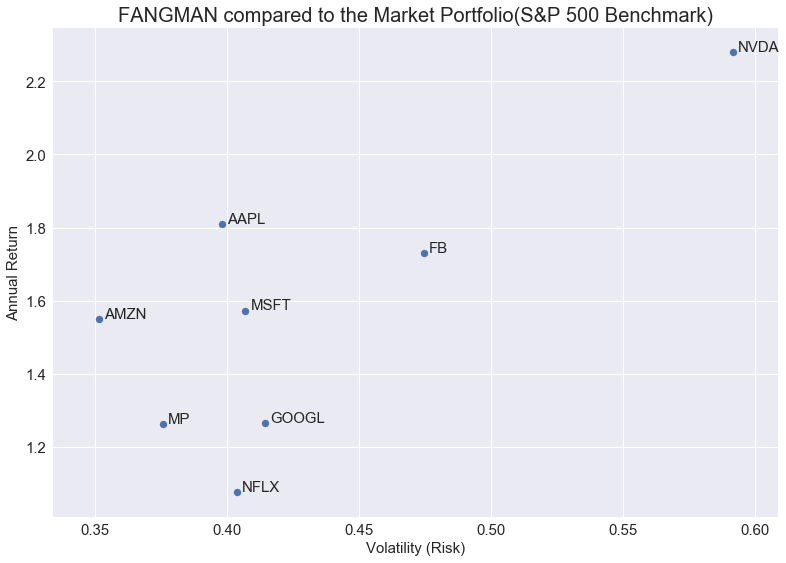

In [38]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Volatility (Risk)", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("FANGMAN compared to the Market Portfolio(S&P 500 Benchmark)", fontsize = 20)
plt.show()

Calculating the Sharpe Ratio including the Market Portfolio (MP):

In [39]:
risk_free_return = 0.014
risk_free_risk = 0

In [40]:
rf = [risk_free_return, risk_free_risk]
rf

[0.014, 0]

In [41]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe
AAPL,1.81,0.40,4.52
AMZN,1.55,0.35,4.37
FB,1.73,0.47,3.62
GOOGL,1.27,0.41,3.02
MSFT,1.57,0.41,3.83
NFLX,1.08,0.40,2.63
NVDA,2.28,0.59,3.83
MP,1.26,0.38,3.32


Notice that the Market Porfolo has a Positive sharpe ratio, this generally moves we're expecting positive performance.

## Systematic and Unsystematic Risk  Including the Market Portfolio

Systematic risk refers to the risk inherent to the entire market or market segment. Systematic risk, also known as “undiversifiable risk,” “volatility” or “market risk,” affects the overall market, not just a particular stock or industry. This type of risk is both unpredictable and impossible to completely avoid. It cannot be mitigated through diversification, only through hedging or by using the correct asset allocation strategy.

Unsystematic risk is unique to a specific company or industry. Also known as “nonsystematic risk,” "specific risk," "diversifiable risk" or "residual risk," in the context of an investment portfolio, unsystematic risk can be reduced through diversification.

Variance is used to compare the relative performance of each asset in a portfolio:

In [42]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)
summary

,Return,Risk,Sharpe,TotalRisk_var
AAPL,1.81,0.40,4.52,0.16
AMZN,1.55,0.35,4.37,0.12
FB,1.73,0.47,3.62,0.23
GOOGL,1.27,0.41,3.02,0.17
MSFT,1.57,0.41,3.83,0.17
NFLX,1.08,0.40,2.63,0.16
NVDA,2.28,0.59,3.83,0.35
MP,1.26,0.38,3.32,0.14


In statistics, covariance is a metric used to measure how one random variable moves in relation to another random variable. In investment, covariance of returns measures how the rate of return on one asset varies in relation to the rate of return on other assets or a portfolio.

In [43]:
COV = ret.cov()*252
# COV, if we add "COV" it'll create a long chart

In [44]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [45]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AAPL,1.81,0.40,4.52,0.16,0.13,0.03
AMZN,1.55,0.35,4.37,0.12,0.07,0.06
FB,1.73,0.47,3.62,0.23,0.13,0.10
GOOGL,1.27,0.41,3.02,0.17,0.13,0.04
MSFT,1.57,0.41,3.83,0.17,0.13,0.03
NFLX,1.08,0.40,2.63,0.16,0.04,0.12
NVDA,2.28,0.59,3.83,0.35,0.17,0.18
MP,1.26,0.38,3.32,0.14,0.14,-0.00


### Systematic and Unsystematic risk of stocks including the Market Portfolio (MP = S&P500 Index):

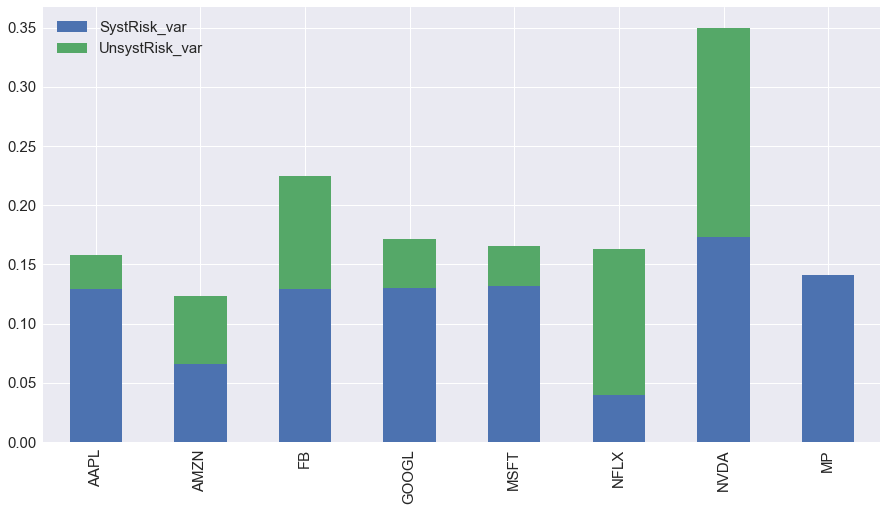

In [46]:
summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Determining the beta of the stocks in the portfolio compared to the Market Portfolio (S&P 500 Index):

Beta is a measure of the volatility (Risk), or systematic risk, of a security or portfolio, in comparison to the market as a whole. 

In [47]:
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
AAPL,1.81,0.40,4.52,0.16,0.13,0.03,0.92
AMZN,1.55,0.35,4.37,0.12,0.07,0.06,0.47
FB,1.73,0.47,3.62,0.23,0.13,0.10,0.91
GOOGL,1.27,0.41,3.02,0.17,0.13,0.04,0.92
MSFT,1.57,0.41,3.83,0.17,0.13,0.03,0.94
NFLX,1.08,0.40,2.63,0.16,0.04,0.12,0.28
NVDA,2.28,0.59,3.83,0.35,0.17,0.18,1.23
MP,1.26,0.38,3.32,0.14,0.14,-0.00,1.00


Stocks with the beta above 1, means that they get largely affected by market condidtions in a postive and a negative way due to systematic risk. If the S&P 500 were to drop around 5%, these stocks would be likely to drop towards 8 to 10% in a day and if the S&P500 would of rallyed 5% then those stocks would gained 8 to 10% in a day. In other words high beta stock tend to have more risk, with greater risk comes greater potential reward. 

## Determining The Security Market Line 

The security market line is an investment evaluation tool derived from the CAPM—a model that describes risk-return relationship for securities—and is based on the assumption that investors need to be compensated for both the time value of money (TVM) and the corresponding level of risk associated with any investment, referred to as the risk premium.

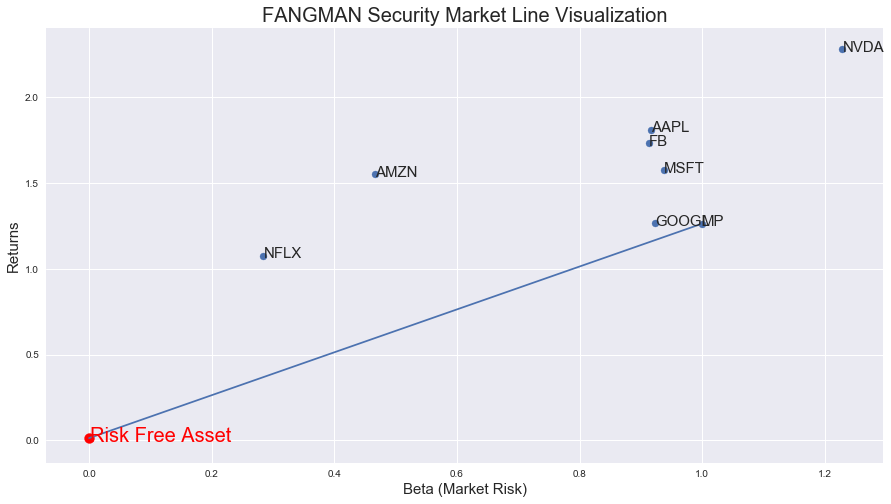

In [48]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["MP", "beta"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "red")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "Red")
plt.xlabel("Beta (Market Risk)", fontsize = 15)
plt.ylabel("Returns", fontsize = 15)
plt.title("FANGMAN Security Market Line Visualization", fontsize = 20)
plt.show()

Security Market Line Analysis: Stocks that fall below the SML is an indictor that they are underperforming the market. Meanwhile stocks above the SML indicate that they are outperforming the market.

In [49]:
summary["capm_ret"] = rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.beta

In [50]:
summary["alpha"] = summary.Return - summary.capm_ret
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AAPL,1.81,0.40,4.52,0.16,0.13,0.03,0.92,1.16,0.65
AMZN,1.55,0.35,4.37,0.12,0.07,0.06,0.47,0.60,0.95
FB,1.73,0.47,3.62,0.23,0.13,0.10,0.91,1.15,0.58
GOOGL,1.27,0.41,3.02,0.17,0.13,0.04,0.92,1.17,0.10
MSFT,1.57,0.41,3.83,0.17,0.13,0.03,0.94,1.18,0.39
NFLX,1.08,0.40,2.63,0.16,0.04,0.12,0.28,0.37,0.71
NVDA,2.28,0.59,3.83,0.35,0.17,0.18,1.23,1.55,0.73
MP,1.26,0.38,3.32,0.14,0.14,-0.00,1.00,1.26,0.00


CAPM Analysis: Since we know that the CAPM is used for determining expected returns on stocks, we can notice that each stock is expected to reach positve returns, We can also notice that stocks with the highest betas are expected to have higher returns. This could of course change do to systematic condidtons.  

Alpha Analysis: Understanding that Alpha is used to determine whether or not a stock would beat the overall market. We can notice that stocks in the Portfolio that have a chance of not beating the over all market are the stocks below the Security Market Line which have a negative alpha value.

## Mean Variance Analysis Multi Asset Portfolio 

Mean-variance analysis is the process of weighing risk, expressed as variance, against expected return. Investors use mean-variance analysis to make decisions about which financial instruments to invest in, based on how much risk they are willing to take on in exchange for different levels of reward. Mean-variance analysis allows investors to find the biggest reward at a given level of risk or the least risk at a given level of return.

Mean-variance analysis is one part of modern portfolio theory, which assumes that investors will make rational decisions about investments if they have complete information. One assumption is that investors want low risk and high reward. 

source: https://www.investopedia.com/terms/m/meanvariance-analysis.asp

In [51]:
ret.tail().dropna()

,AAPL,AMZN,FB,GOOGL,MSFT,NFLX,NVDA,MP
Date,,,,,,,,
2020-06-26,-0.03,-0.02,-0.08,-0.05,-0.02,-0.05,-0.04,-0.02
2020-06-29,0.02,-0.00,0.02,0.03,0.01,0.01,0.00,0.01
2020-06-30,0.01,0.03,0.03,0.01,0.03,0.02,0.03,0.02
2020-07-01,-0.00,0.04,0.05,0.02,0.01,0.07,0.00,0.01
2020-07-02,0.00,0.00,-0.02,0.02,0.01,-0.02,0.01,0.00


Daily returns of stocks excluding the Market Portfolio (S&P 500 Index Benchmark)

In [52]:
Multi_Asset = ret.iloc[:, :7]
Multi_Asset.tail().dropna()

,AAPL,AMZN,FB,GOOGL,MSFT,NFLX,NVDA
Date,,,,,,,
2020-06-26,-0.03,-0.02,-0.08,-0.05,-0.02,-0.05,-0.04
2020-06-29,0.02,-0.00,0.02,0.03,0.01,0.01,0.00
2020-06-30,0.01,0.03,0.03,0.01,0.03,0.02,0.03
2020-07-01,-0.00,0.04,0.05,0.02,0.01,0.07,0.00
2020-07-02,0.00,0.00,-0.02,0.02,0.01,-0.02,0.01


Return and Risk of stocks in the portfolio

In [53]:
summ_Multi = ann_risk_return(Multi_Asset)
summ_Multi

,Return,Risk
AAPL,1.81,0.40
AMZN,1.55,0.35
FB,1.73,0.47
GOOGL,1.27,0.41
MSFT,1.57,0.41
NFLX,1.08,0.40
NVDA,2.28,0.59


Applying the asset allocation from the Max Sharpe Ratio to obtain expected returns following forward looking strategy

In [54]:
w_AMZN = 0.30
w_AAPL = 0.30
w_MSFT = 0.15
w_NVDA = 0.11
w_GOOGL = 0.06
w_NFLX = 0.06
w_FB = 0.02
ws = np.array([w_AMZN, w_AAPL, w_MSFT, w_NVDA, w_GOOGL, w_NFLX, w_FB])
ws

array([0.3 , 0.3 , 0.15, 0.11, 0.06, 0.06, 0.02])

### Calculating Portfolio Expected Return
Applying expected returns gathered from CAPM

In [55]:
ERet_AMZN = 0.60
ERet_AAPL = 1.16
ERet_MSFT = 1.18
ERet_NVDA = 1.55
ERet_GOOGL = 1.17
ERet_NFLX = 0.37
ERet_FB =  1.15
ERets = pd.Series({'AMZN': ERet_AMZN, 'AAPL': ERet_AAPL, 'MSFT': ERet_MSFT, 'NVDA': ERet_NVDA, 'GOOGL': ERet_GOOGL, 
                   'NFLX': ERet_NFLX, 'FB': ERet_FB})
ERets

AMZN    0.60
AAPL    1.16
MSFT    1.18
NVDA    1.55
GOOGL   1.17
NFLX    0.37
FB      1.15
dtype: float64

Portfolio Expected Return Formula: 

Expected Return Portfolio = Weight of stock * Expected Return of stock + Weight of stock * Expected Return of stock = 
Expected Return of a portfolio

the more stocks you have, the more you have to repeat the process

In [56]:
ERet_P = w_AMZN * ERet_AMZN + w_AAPL * ERet_AAPL + w_MSFT * ERet_MSFT + w_NVDA * ERet_NVDA + w_GOOGL * ERet_GOOGL + w_NFLX * ERet_NFLX + w_FB * ERet_FB
ERet_P

0.9909000000000001

### Calculating  Portfolio Expected Risk 

In [57]:
cov_matrix = Multi_Asset.cov()*252
#cov_matrix, by adding that. It will bring up a big list

In [58]:
ERisk_P = np.sqrt(cov_matrix.dot(ws).dot(ws))
ERisk_P

0.3511068010367881

### Expected Portfolio Return and Risk Analysis For Equities Section: Expected Portfolio Return is 99.09% and Expected Risk is 35.11%

## Forward Looking FANGMAN Portfolios 

In [59]:
ret.tail().dropna()

,AAPL,AMZN,FB,GOOGL,MSFT,NFLX,NVDA,MP
Date,,,,,,,,
2020-06-26,-0.03,-0.02,-0.08,-0.05,-0.02,-0.05,-0.04,-0.02
2020-06-29,0.02,-0.00,0.02,0.03,0.01,0.01,0.00,0.01
2020-06-30,0.01,0.03,0.03,0.01,0.03,0.02,0.03,0.02
2020-07-01,-0.00,0.04,0.05,0.02,0.01,0.07,0.00,0.01
2020-07-02,0.00,0.00,-0.02,0.02,0.01,-0.02,0.01,0.00


In [60]:
COV_C = COV.iloc[:-1, :-1]
COV_C

,AAPL,AMZN,FB,GOOGL,MSFT,NFLX,NVDA
AAPL,0.16,0.09,0.15,0.14,0.15,0.07,0.19
AMZN,0.09,0.12,0.11,0.09,0.10,0.11,0.12
FB,0.15,0.11,0.23,0.17,0.15,0.09,0.19
GOOGL,0.14,0.09,0.17,0.17,0.15,0.08,0.18
MSFT,0.15,0.10,0.15,0.15,0.17,0.08,0.20
NFLX,0.07,0.11,0.09,0.08,0.08,0.16,0.10
NVDA,0.19,0.12,0.19,0.18,0.20,0.10,0.35


In [61]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AAPL,1.81,0.40,4.52,0.16,0.13,0.03,0.92,1.16,0.65
AMZN,1.55,0.35,4.37,0.12,0.07,0.06,0.47,0.60,0.95
FB,1.73,0.47,3.62,0.23,0.13,0.10,0.91,1.15,0.58
GOOGL,1.27,0.41,3.02,0.17,0.13,0.04,0.92,1.17,0.10
MSFT,1.57,0.41,3.83,0.17,0.13,0.03,0.94,1.18,0.39
NFLX,1.08,0.40,2.63,0.16,0.04,0.12,0.28,0.37,0.71
NVDA,2.28,0.59,3.83,0.35,0.17,0.18,1.23,1.55,0.73
MP,1.26,0.38,3.32,0.14,0.14,-0.00,1.00,1.26,0.00


In [62]:
Summary_C = summary.iloc[:-1, :].copy()
Summary_C

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AAPL,1.81,0.40,4.52,0.16,0.13,0.03,0.92,1.16,0.65
AMZN,1.55,0.35,4.37,0.12,0.07,0.06,0.47,0.60,0.95
FB,1.73,0.47,3.62,0.23,0.13,0.10,0.91,1.15,0.58
GOOGL,1.27,0.41,3.02,0.17,0.13,0.04,0.92,1.17,0.10
MSFT,1.57,0.41,3.83,0.17,0.13,0.03,0.94,1.18,0.39
NFLX,1.08,0.40,2.63,0.16,0.04,0.12,0.28,0.37,0.71
NVDA,2.28,0.59,3.83,0.35,0.17,0.18,1.23,1.55,0.73


ER1 = Expected Return 1 

Expected Returns are gathered from CAPM analysis

In [63]:
Summary_C['ER1'] = [1.20, 0.70, 1.20, 1.20, 1.25, 1.0, 1.55]
Summary_C

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha,ER1
AAPL,1.81,0.40,4.52,0.16,0.13,0.03,0.92,1.16,0.65,1.20
AMZN,1.55,0.35,4.37,0.12,0.07,0.06,0.47,0.60,0.95,0.70
FB,1.73,0.47,3.62,0.23,0.13,0.10,0.91,1.15,0.58,1.20
GOOGL,1.27,0.41,3.02,0.17,0.13,0.04,0.92,1.17,0.10,1.20
MSFT,1.57,0.41,3.83,0.17,0.13,0.03,0.94,1.18,0.39,1.25
NFLX,1.08,0.40,2.63,0.16,0.04,0.12,0.28,0.37,0.71,1.00
NVDA,2.28,0.59,3.83,0.35,0.17,0.18,1.23,1.55,0.73,1.55


In [64]:
noa = len(Summary_C.index)
noa

7

In [65]:
nop = 200000
nop

200000

In [66]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)
matrix

array([[0.69646919, 0.28613933, 0.22685145, ..., 0.71946897, 0.42310646,
        0.9807642 ],
       [0.68482974, 0.4809319 , 0.39211752, ..., 0.72904971, 0.43857224,
        0.0596779 ],
       [0.39804426, 0.73799541, 0.18249173, ..., 0.53155137, 0.53182759,
        0.63440096],
       ...,
       [0.09473912, 0.50718433, 0.74273136, ..., 0.20677191, 0.91732641,
        0.14892839],
       [0.97647657, 0.46928043, 0.11503676, ..., 0.83645442, 0.66311555,
        0.97932953],
       [0.69016096, 0.45910987, 0.8055111 , ..., 0.60292957, 0.28018939,
        0.96508001]])

In [67]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)
weights

array([[0.17931222, 0.07366913, 0.05840494, ..., 0.18523372, 0.10893254,
        0.25250652],
       [0.21891035, 0.15373306, 0.12534296, ..., 0.23304556, 0.14019252,
        0.01907643],
       [0.12470984, 0.23121873, 0.05717584, ..., 0.16653848, 0.16662502,
        0.19876192],
       ...,
       [0.02748759, 0.14715434, 0.2154959 , ..., 0.05999275, 0.26615287,
        0.04321005],
       [0.22793625, 0.10954284, 0.02685271, ..., 0.19525126, 0.15478924,
        0.2286022 ],
       [0.16503739, 0.10978641, 0.19262093, ..., 0.14417785, 0.06700136,
        0.23077846]])

In [68]:
Return = Summary_C.ER1.dot(weights.T)
Return

array([1.23901789, 1.113424  , 1.12895923, ..., 1.09131541, 1.20404406,
       1.21968788])

In [69]:
Risk = np.sqrt((COV_C.dot(weights.T).T * weights).sum(axis =1))

In [70]:
Risk.shape

(200000,)

In [71]:
Return.shape

(200000,)

Risk Free Rate

In [72]:
rf = 0.14

Sharpe Ratio formula:

In [73]:
Sharpe = (Return - rf) / Risk

In [74]:
summ = pd.DataFrame({'Return': Return, 'Risk' : Risk, 'Sharpe' : Sharpe})
summ

,Return,Risk,Sharpe
0,1.24,0.40,2.76
1,1.11,0.35,2.75
2,1.13,0.37,2.68
3,1.11,0.36,2.68
4,1.11,0.36,2.70
...,...,...,...
199995,1.21,0.40,2.69
199996,1.07,0.36,2.62
199997,1.09,0.35,2.69
199998,1.20,0.38,2.77


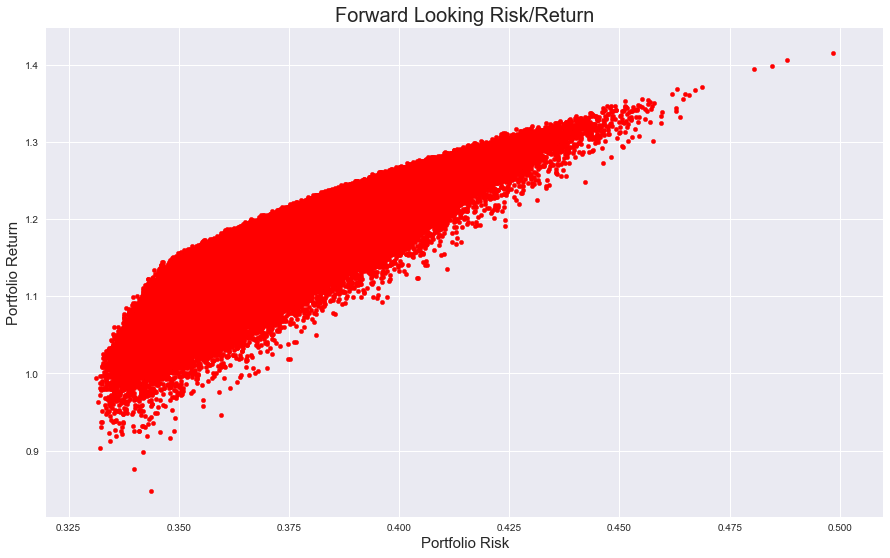

In [75]:
plt.figure(figsize = (15,9))
plt.scatter(summ.Risk, summ.Return, s=20, color = "red")
plt.xlabel('Portfolio Risk', fontsize = 15)
plt.ylabel('Portfolio Return', fontsize = 15)
plt.title('Forward Looking Risk/Return', fontsize =20)
plt.show()

In [76]:
summ.describe()

,Return,Risk,Sharpe
count,200000.00,200000.00,200000.00
mean,1.16,0.37,2.71
std,0.06,0.02,0.07
min,0.85,0.33,2.06
25%,1.12,0.36,2.67
50%,1.16,0.37,2.72
75%,1.20,0.39,2.76
max,1.42,0.50,2.91


Forward Looking optimal portfolio, is portfolio 8,469 out of 200,000 portfolios 

In [77]:
summ.Sharpe.idxmax()

8469

Results of optimal Forward Looking Portfolio

In [78]:
summ.iloc[summ.Sharpe.idxmax(), :]

Return   1.16
Risk     0.35
Sharpe   2.91
Name: 8469, dtype: float64

Optimal Weights 

In [79]:
weights[summ.Sharpe.idxmax()]

array([0.23423023, 0.00664241, 0.01137321, 0.16518877, 0.30275703,
       0.27579174, 0.00401661])

In [80]:
PF1 = pd.Series(index = Summary_C.index, data = weights [summ.Sharpe.idxmax()])
PF1

AAPL    0.23
AMZN    0.01
FB      0.01
GOOGL   0.17
MSFT    0.30
NFLX    0.28
NVDA    0.00
dtype: float64

# Forward Looking FANGMAN Optimal Portfolio Asset Allocation

M1 Finance Asset Allocation: https://m1.finance/_7tYw-ZObSbe

# Interactive Performance Charts 

In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf

In [2]:
cf.set_config_file(offline = True)

In [3]:
FANGMAN_Stocks = pd.read_csv('FANGMAN_Stocks.csv', header = [0,1], index_col = [0], parse_dates = [0]).Close

In [4]:
FANGMAN_Stocks.tail().dropna()

,AAPL,AMZN,FB,GOOGL,MSFT,NFLX,NVDA
Date,,,,,,,
2020-06-26,353.630005,2692.870117,216.080002,1362.540039,196.330002,443.399994,366.200012
2020-06-29,361.779999,2680.379883,220.639999,1397.170044,198.440002,447.239990,368.000000
2020-06-30,364.799988,2758.820068,227.070007,1418.050049,203.509995,455.040009,379.910004
2020-07-01,364.109985,2878.699951,237.550003,1442.000000,204.699997,485.640015,381.200012
2020-07-02,364.109985,2890.300049,233.419998,1469.930054,206.259995,476.890015,384.489990


In [5]:
norm = FANGMAN_Stocks.div(FANGMAN_Stocks.iloc[0, :]).mul(100)
norm

,AAPL,AMZN,FB,GOOGL,MSFT,NFLX,NVDA
Date,,,,,,,
2020-03-23,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-03-24,110.032540,101.958663,108.696819,107.198354,109.089573,99.181175,117.156420
2020-03-25,109.426398,99.107120,105.476030,104.505136,108.045303,95.037063,115.482624
2020-03-26,115.184743,102.767459,110.290337,110.320363,114.803652,100.754990,120.945972
2020-03-27,110.415836,99.856531,105.867648,105.324771,110.089720,99.125657,118.825517
...,...,...,...,...,...,...,...
2020-06-26,157.610203,141.519220,145.901413,129.257305,144.381533,123.074363,172.175470
2020-06-29,161.242593,140.862817,148.980412,132.542479,145.933232,124.140229,173.021767
2020-06-30,162.588579,144.985108,153.322078,134.523260,149.661716,126.305277,178.621468


In [6]:
norm.iplot(kind = 'line', fill = True, colorscale = 'rdylbu', theme = 'solar', 
          title = 'FANGMAN Stocks Performance since Market Bottom', xTitle = 'Time', yTitle = 'Stock Prices')

In [7]:
FANGMAN_Stocks2 = pd.read_csv('FANGMAN_Stocks2.csv', header = [0,1], index_col = [0], parse_dates = [0]).Close

In [8]:
FANGMAN_Stocks2.tail().dropna()

,AAPL,AMZN,FB,GOOGL,MSFT,NFLX,NVDA
Date,,,,,,,
2020-06-26,353.630005,2692.870117,216.080002,1362.540039,196.330002,443.399994,366.200012
2020-06-29,361.779999,2680.379883,220.639999,1397.170044,198.440002,447.239990,368.000000
2020-06-30,364.799988,2758.820068,227.070007,1418.050049,203.509995,455.040009,379.910004
2020-07-01,364.109985,2878.699951,237.550003,1442.000000,204.699997,485.640015,381.200012
2020-07-02,364.109985,2890.300049,233.419998,1469.930054,206.259995,476.890015,384.489990


In [10]:
norm = FANGMAN_Stocks2.div(FANGMAN_Stocks.iloc[0, :]).mul(100)
norm

,AAPL,AMZN,FB,GOOGL,MSFT,NFLX,NVDA
Date,,,,,,,
2018-01-02,76.774969,62.486404,122.498306,101.810019,63.207824,55.810923,93.727963
2018-01-03,76.761599,63.284685,124.692769,103.547002,63.501986,56.915649,99.896563
2018-01-04,77.118154,63.567948,124.463197,103.949229,64.060894,57.076640,100.423148
2018-01-05,77.996169,64.595368,126.164752,105.327619,64.855130,58.286844,101.274151
2018-01-08,77.706471,65.527137,127.130311,105.699483,64.921313,58.858636,104.377261
...,...,...,...,...,...,...,...
2020-06-26,157.610203,141.519220,145.901413,129.257305,144.381533,123.074363,172.175470
2020-06-29,161.242593,140.862817,148.980412,132.542479,145.933232,124.140229,173.021767
2020-06-30,162.588579,144.985108,153.322078,134.523260,149.661716,126.305277,178.621468


In [11]:
norm.iplot(kind = 'line', fill = True, colorscale = 'rdylbu', theme = 'solar', 
          title = 'FANGMAN Stocks Performance From 2018 to Present', xTitle = 'Time', yTitle = 'Stock Prices')